<p align="center"><img src="https://accredian.com/wp-content/uploads/2023/06/cropped-accredian-ws-logo-e1686627987452.webp" width="300" height="160" /></p>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
**4.** [**Data Acquisation and Wrangling**](#Section4)<br>
  - **4.1** [**Department data**](#Section41)
  - **4.2** [**Employee details data**](#Section42)
  - **4.2** [**Employee data**](#Section4)
  
**5.** [**Data merging**](#Section5)<br>
**6.** [**Handling missing values**](#Section6)<br>
**7.** [**Exploratory Data Analysis**](#Section7)<br>
**8.** [**Feature engineering**](#Section8)<br>
**9.** [**Model evaluation**](#Section9)<br>
**10.** [**Model Threshold Analysis**](#Section10)<br>
**11.** [**Hyper parameter tuning**](#Section11)<br>
**12.** [**Model cross validation**](#Section12)<br>
**13.** [**Unseen Data Analysis**](#Section13)<br>
**14.** [**Conclusion**](#Section14)<br>


---
<a name = Section1></a>
# **1. Introduction**
---

- The HR Department of a software company has solicted for a proactive approach towards employee retention.
- The current practice relies on exit interviews conducted post-employment which incudes interview insights, feedbacks of departing employees, and the delayed implementation of policy changes.
- To address above and other shortcomings, the HR Department has engaged data science consultants.
- The objective is to focus on the existing exit interview process with a data-driven approach, proactive strategy that predicts employee attrition and enables timely intervention.

<center><img src="https://projects.accredian.com/capstone2/hr.png"></center>

---
<a name = Section2></a>
# **2. Problem Statement**
---

- The current exit interview system lacks efficiency and foresight, relying on post-departure interviews that are susceptible to interviewer skill variations.
- Furthermore, the insights gathered are not easily aggregated, hindering the identification of overarching patterns.
- Additionally, the reactive nature of the process means that policy changes are implemented only after an employee has already decided to leave.
- To overcome these challenges, the HR Department seeks a data-driven solution that leverages predictive modeling to identify employees at risk of leaving.
- This approach aims to provide actionable insights for proactive interventions, enabling HR professionals to address concerns, offer support, and implement policy changes before it's too late.

---
<a name = Section3></a>
# **3. Installing and Importing Libraries**
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install xgboost

In [ ]:
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 kB 31.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.21.12 which is incompatible.


In [ ]:
import mysql.connector as sql

---
<a name = Section4></a>
# **4. Data Acquisation and Wrangling**
---

<a name = Section41></a>
### **4.1 Department data**

In [ ]:
#Downloading the dataset
connection = sql.connect(host='cpanel.insaid.co',
                                         database='Capstone2',
                                         user='student',
                                         password='student')

cursor = connection.cursor()

cursor.execute('SELECT * FROM department_data')

table_rows = cursor.fetchall()

dept_data = pd.DataFrame(table_rows)

dept_data=pd.read_sql_query("SELECT * FROM department_data ",connection)

dept_data.head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('dept_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('dept_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('dept_head').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['dept_name'].value_counts()
    for x_label, grp in _df_3.groupby('dept_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('dept_id')
_ = plt.ylabel('dept_name')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['dept_head'].value_counts()
    for x_label, grp in _df_4.groupby('dept_name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('dept_name')
_ = plt.ylabel('dept_head')

In [ ]:
dept_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [ ]:
dept_data.nunique()

dept_id      11
dept_name    11
dept_head    11
dtype: int64

In [ ]:
dept_data['dept_name'].unique()

array(['IT', 'Sales', 'Temp', 'Engineering', 'Support', 'Finance',
       'Procurement', 'Admin', 'Management', 'Marketing', 'Product'],
      dtype=object)

In [ ]:
dept_data['dept_head'].unique()

array(['Henry Adey', 'Edward J Bayley', 'Micheal Zachrey',
       'Sushant Raghunathan K', 'Amelia Westray', 'Aanchal J',
       'Louie Viles', 'Evelyn Tolson', 'Ellie Trafton', 'Reuben Swann',
       'Darcy Staines'], dtype=object)

In [ ]:
dept_data['dept_id'].unique()

array(['D00-IT', 'D00-SS', 'D00-TP', 'D00-ENG', 'D00-SP', 'D00-FN',
       'D00-PR', 'D00-AD', 'D00-MN', 'D00-MT', 'D00-PD'], dtype=object)

### Observations on dept_data:
•	Dataset has total 11 entries and 3 columns which are dept_id, dept_name and
dept_head.

•	All three columns have datatype object.

•	No null values are present in the dataset.

•	No duplicates are found in the dataset.

•	There are total 11 departments in the company-IT', 'Sales', 'Temp', 'Engineering', 'Support', 'Finance','Procurement', 'Admin', 'Management', 'Marketing', 'Product'

•	Total 11 heads for 11 departments:Henry Adey', 'Edward J Bayley', 'Micheal Zachrey','Sushant Raghunathan K', 'Amelia Westray', 'Aanchal J','Louie Viles', 'Evelyn Tolson', 'Ellie Trafton', 'Reuben Swann','Darcy Staines'.

<a name = Section42></a>
### **4.2 Employee details data**

In [ ]:
connection = sql.connect(host='cpanel.insaid.co',
                                         database='Capstone2',
                                         user='student',
                                         password='student')

cursor = connection.cursor()

cursor.execute('SELECT * FROM employee_details_data')

table_rows = cursor.fetchall()

edd = pd.DataFrame(table_rows)

edd=pd.read_sql_query("SELECT * FROM employee_details_data ",connection)

edd.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [ ]:
edd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [ ]:
edd.describe()

,employee_id,age
count,14245.000000,14245.000000
mean,112123.050544,32.889926
std,8500.457343,9.970834
min,100101.000000,22.000000
25%,105775.000000,24.000000
50%,111298.000000,29.000000
75%,116658.000000,41.000000
max,148988.000000,57.000000


In [ ]:
edd.isnull().sum()

employee_id       0
age               0
gender            0
marital_status    0
dtype: int64

In [ ]:
edd['marital_status'].unique()

array(['Married', 'Unmarried'], dtype=object)

In [ ]:
edd['marital_status'].value_counts()

Unmarried    7283
Married      6962
Name: marital_status, dtype: int64

In [ ]:
edd['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
edd['gender'].value_counts()

Male      9382
Female    4863
Name: gender, dtype: int64

## Observations on employee_details_data:
•	There is total of 14245 entries in the dataset and 4 columns which are employee_id, age, gender and marital_status.

•	Employee_id and age have datatype as integer and gender and marital status have datatype as object.

•	No null values are present in the dataset.

•	Employees age ranges from minimum 22 to maximum 57, average age 33 yrs.

•	Marital_status has two categories-married and unmarried.

•	Gender has two categories- male and female.

•	Unmarried staff is more than married staff. unmarried-7283, married-6962.

•	Male employees are more than female employee. male-9382, female-4863.

•	Maximum employees of age 24 are there.

<a name = Section43></a>
### **4.3 Employee Data**

In [ ]:
connection = sql.connect(host='cpanel.insaid.co',
                                         database='Capstone2',
                                         user='student',
                                         password='student')

cursor = connection.cursor()

cursor.execute('SELECT * FROM employee_data')

table_rows = cursor.fetchall()

ed = pd.DataFrame(table_rows)

ed=pd.read_sql_query("SELECT * FROM employee_data ",connection)

ed.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [ ]:
ed.tail()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
14145,245.0,D00-SS,NaN,0.850785,6,NaN,medium,0.225084,Employed,5.0,101809
14146,192.0,D00-SS,NaN,0.951901,3,NaN,medium,0.539834,Employed,3.0,116153
14147,175.0,D00-MN,NaN,0.854538,4,NaN,medium,0.934465,Employed,3.0,119780
14148,268.0,D00-MT,NaN,0.900887,5,NaN,medium,0.906613,Left,5.0,115325
14149,268.0,D00-IT,1.0,0.897098,2,NaN,low,0.459371,Employed,4.0,112312


In [ ]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [ ]:
ed.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id'],
      dtype='object')

In [ ]:
ed.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
count,14150.000000,2046.0,12663.000000,14150.000000,297.0,14000.000000,14000.000000,14150.000000
mean,199.994346,1.0,0.718399,3.778304,1.0,0.621212,3.499357,112080.750247
std,50.833697,0.0,0.173108,1.250162,0.0,0.250482,1.462584,8748.202856
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000,0.000000
25%,155.000000,1.0,0.563711,3.000000,1.0,0.450356,3.000000,105772.500000
50%,199.000000,1.0,0.724731,4.000000,1.0,0.652394,3.000000,111291.500000
75%,245.000000,1.0,0.871409,5.000000,1.0,0.824925,4.000000,116650.750000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000,148988.000000


In [ ]:
ed.isnull().sum()

avg_monthly_hrs          0
department             707
filed_complaint      12104
last_evaluation       1487
n_projects               0
recently_promoted    13853
salary                   0
satisfaction           150
status                   0
tenure                 150
employee_id              0
dtype: int64

In [ ]:
ed.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id'],
      dtype='object')

In [ ]:
ed['status'].value_counts()

Employed    10784
Left         3366
Name: status, dtype: int64

In [ ]:
dup = ed[ed.duplicated()]

In [ ]:
dup

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
14121,265.0,D00-MN,1.0,0.825672,3,NaN,low,0.545978,Employed,10.0,112373
14122,282.0,D00-SS,NaN,0.875427,6,NaN,low,0.065908,Left,4.0,116247
14123,206.0,D00-SS,NaN,1.000000,6,NaN,medium,0.783548,Left,5.0,112203
14124,161.0,D00-IT,NaN,0.715893,6,NaN,medium,0.867768,Left,4.0,108128
14125,163.0,D00-SP,NaN,0.486176,3,NaN,medium,0.832118,Employed,3.0,115446
14126,208.0,D00-FN,NaN,0.699756,4,NaN,low,0.476216,Employed,5.0,110546
14127,152.0,D00-MT,NaN,0.510016,3,NaN,low,0.826531,Employed,2.0,111968
14128,307.0,D00-IT,NaN,0.905708,7,NaN,low,0.125275,Left,4.0,111323
14129,212.0,D00-PD,NaN,0.773018,4,NaN,medium,0.829316,Employed,2.0,117454
14130,148.0,D00-MN,NaN,0.577112,3,NaN,high,0.481001,Employed,10.0,109425


from matplotlib import pyplot as plt
dup['avg_monthly_hrs'].plot(kind='hist', bins=20, title='avg_monthly_hrs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dup['filed_complaint'].plot(kind='hist', bins=20, title='filed_complaint')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dup['last_evaluation'].plot(kind='hist', bins=20, title='last_evaluation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dup['n_projects'].plot(kind='hist', bins=20, title='n_projects')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
dup.groupby('department').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
dup.groupby('salary').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
dup.groupby('status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dup.plot(kind='scatter', x='avg_monthly_hrs', y='filed_complaint', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dup.plot(kind='scatter', x='filed_complaint', y='last_evaluation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dup.plot(kind='scatter', x='last_evaluation', y='n_projects', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dup.plot(kind='scatter', x='n_projects', y='satisfaction', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dup['avg_monthly_hrs'].plot(kind='line', figsize=(8, 4), title='avg_monthly_hrs')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dup['filed_complaint'].plot(kind='line', figsize=(8, 4), title='filed_complaint')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dup['last_evaluation'].plot(kind='line', figsize=(8, 4), title='last_evaluation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dup['n_projects'].plot(kind='line', figsize=(8, 4), title='n_projects')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['salary'].value_counts()
    for x_label, grp in dup.groupby('department')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('department')
_ = plt.ylabel('salary')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['status'].value_counts()
    for x_label, grp in dup.groupby('salary')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('salary')
_ = plt.ylabel('status')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dup['department'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dup, x='avg_monthly_hrs', y='department', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dup['salary'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dup, x='avg_monthly_hrs', y='salary', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dup['status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dup, x='avg_monthly_hrs', y='status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dup['department'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dup, x='filed_complaint', y='department', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
len(ed)-len(ed.drop_duplicates())

29

### Observations on employee_data:
•	Employee_data has 14150 entries and total 11 features.

•	6 features are numerical and 5 categorical.

•	Department has 707 missing values., filed_complaint has 12104 missing values., last_evaluation- 1487, recently_promoted-13853, satisfaction-150 and tenure-150 has missing values.

•	Dataset has 29 duplicate rows.

•	n_projects is highly correlated with status.

•	satisfaction is highly correlated with status.

•	199 avg monthly hrs with minimum 49 and max 310.

•	last_evaluation ranges from 0 to 1. minimum of 0.3 max-1 and avg 0.7.

•	Max no of projects seems to be 7 per year. and avg of 4.

•	Most of the employees worked for 3.5 yrs.   

<a name = Section5></a>
## **5. Data Merging**

In [ ]:
data=pd.merge(edd, ed, on='employee_id', how='inner')

In [ ]:
data.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,113558,43,Male,Married,111.0,D00-PR,NaN,0.753977,5,1.0,medium,0.921208,Employed,4.0
1,112256,24,Female,Unmarried,201.0,D00-MN,NaN,0.964453,3,NaN,medium,0.568479,Employed,3.0
2,112586,22,Female,Unmarried,239.0,D00-SS,NaN,0.756458,3,NaN,low,0.144812,Employed,6.0
3,108071,36,Male,Married,151.0,D00-PR,NaN,0.608282,5,NaN,medium,0.210300,Employed,6.0
4,116915,38,Male,Married,259.0,-IT,NaN,0.749206,4,NaN,medium,0.888514,Employed,3.0


In [ ]:
data.drop_duplicates(keep="first",inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14144
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        14116 non-null  int64  
 1   age                14116 non-null  int64  
 2   gender             14116 non-null  object 
 3   marital_status     14116 non-null  object 
 4   avg_monthly_hrs    14116 non-null  float64
 5   department         13410 non-null  object 
 6   filed_complaint    2041 non-null   float64
 7   last_evaluation    12629 non-null  float64
 8   n_projects         14116 non-null  int64  
 9   recently_promoted  297 non-null    float64
 10  salary             14116 non-null  object 
 11  satisfaction       13966 non-null  float64
 12  status             14116 non-null  object 
 13  tenure             13966 non-null  float64
dtypes: float64(6), int64(3), object(5)
memory usage: 1.6+ MB


In [ ]:
dept_null=data[data['department'].isnull()]

In [ ]:
dept_null

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
31,100745,24,Female,Unmarried,183.0,None,NaN,0.968560,4,NaN,low,0.613921,Employed,2.0
36,118103,51,Female,Married,98.0,None,NaN,0.460061,4,NaN,medium,0.789979,Employed,4.0
43,135194,34,Female,Married,274.0,None,NaN,0.906298,4,NaN,medium,0.819230,Employed,3.0
45,113801,44,Male,Married,221.0,None,NaN,0.748904,4,NaN,medium,0.250428,Employed,5.0
47,100883,40,Female,Married,195.0,None,1.0,0.816122,5,NaN,low,0.945427,Employed,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14034,104262,25,Male,Unmarried,246.0,None,NaN,0.982257,3,NaN,low,0.775212,Employed,3.0
14076,117280,22,Male,Unmarried,178.0,None,NaN,0.708360,3,NaN,medium,0.754021,Employed,2.0
14100,108625,40,Male,Married,310.0,None,NaN,0.765050,7,NaN,medium,0.069755,Left,4.0
14105,127792,23,Female,Unmarried,155.0,None,NaN,0.464598,2,NaN,medium,0.414451,Left,3.0


In [ ]:
data.isnull().sum()

employee_id              0
age                      0
gender                   0
marital_status           0
avg_monthly_hrs          0
department             706
filed_complaint      12075
last_evaluation       1487
n_projects               0
recently_promoted    13819
salary                   0
satisfaction           150
status                   0
tenure                 150
dtype: int64

In [ ]:
data_final=pd.merge(data, dept_data, left_on='department', right_on='dept_id')

In [ ]:
data_final.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,dept_id,dept_name,dept_head
0,113558,43,Male,Married,111.0,D00-PR,NaN,0.753977,5,1.0,medium,0.921208,Employed,4.0,D00-PR,Procurement,Louie Viles
1,108071,36,Male,Married,151.0,D00-PR,NaN,0.608282,5,NaN,medium,0.210300,Employed,6.0,D00-PR,Procurement,Louie Viles
2,110888,42,Male,Married,152.0,D00-PR,NaN,0.673508,6,NaN,medium,0.720369,Employed,3.0,D00-PR,Procurement,Louie Viles
3,115694,26,Male,Unmarried,167.0,D00-PR,NaN,0.874656,3,NaN,medium,0.575996,Employed,4.0,D00-PR,Procurement,Louie Viles
4,107767,43,Male,Married,174.0,D00-PR,1.0,0.634783,5,NaN,medium,0.208138,Employed,5.0,D00-PR,Procurement,Louie Viles


In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13203 entries, 0 to 13202
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        13203 non-null  int64  
 1   age                13203 non-null  int64  
 2   gender             13203 non-null  object 
 3   marital_status     13203 non-null  object 
 4   avg_monthly_hrs    13203 non-null  float64
 5   department         13203 non-null  object 
 6   filed_complaint    1915 non-null   float64
 7   last_evaluation    11804 non-null  float64
 8   n_projects         13203 non-null  int64  
 9   recently_promoted  277 non-null    float64
 10  salary             13203 non-null  object 
 11  satisfaction       13053 non-null  float64
 12  status             13203 non-null  object 
 13  tenure             13053 non-null  float64
 14  dept_id            13203 non-null  object 
 15  dept_name          13203 non-null  object 
 16  dept_head          132

In [ ]:
data_final.columns

Index(['employee_id', 'age', 'gender', 'marital_status', 'avg_monthly_hrs',
       'department', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure',
       'dept_id', 'dept_name', 'dept_head'],
      dtype='object')

In [ ]:
data_final.isnull().sum()

employee_id              0
age                      0
gender                   0
marital_status           0
avg_monthly_hrs          0
department               0
filed_complaint      11288
last_evaluation       1399
n_projects               0
recently_promoted    12926
salary                   0
satisfaction           150
status                   0
tenure                 150
dept_id                  0
dept_name                0
dept_head                0
dtype: int64

In [ ]:
data_final.describe()

,employee_id,age,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,13203.000000,13203.000000,13203.000000,1915.0,11804.000000,13203.000000,277.0,13053.000000,13053.000000
mean,112114.612588,32.929864,200.019844,1.0,0.718416,3.782625,1.0,0.622171,3.507699
std,8504.734621,9.971916,50.906367,0.0,0.172946,1.250969,0.0,0.250558,1.476926
min,100101.000000,22.000000,49.000000,1.0,0.317279,1.000000,1.0,0.040058,2.000000
25%,105769.500000,24.000000,155.000000,1.0,0.564284,3.000000,1.0,0.451098,3.000000
50%,111289.000000,29.000000,199.000000,1.0,0.723653,4.000000,1.0,0.654502,3.000000
75%,116645.500000,41.000000,245.000000,1.0,0.871370,5.000000,1.0,0.825615,4.000000
max,148988.000000,57.000000,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [ ]:
len(data_final)-len(data_final.drop_duplicates())

0

### Observations:
•	Post merger of all the three datasets, it was discovered that there are 13203 records and 16 features.

•	6 features have datatype float, 3 are integer and 8 object.

•	There are null values in the dataset. filed_complaint=11288, last_evaluation-1399, recently_promoted-12926, satisfaction-150, tenure-150.
•	filed_complaint and recently_promoted have datatype float. which need to be converted to integer.

•	department and dept_id represent same thing. The department column was dropped.

•	There are no duplicates in the dataset.

In [ ]:
data_final=data_final.drop(['department'],axis=1)

In [ ]:
# Analysis is required only for permanent employees. Dropped temporary employees.
data_final=data_final.drop(data_final[data_final['dept_id']=='D00-TP'].index)

In [ ]:
data_final.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,dept_id,dept_name,dept_head
0,113558,43,Male,Married,111.0,NaN,0.753977,5,1.0,medium,0.921208,Employed,4.0,D00-PR,Procurement,Louie Viles
1,108071,36,Male,Married,151.0,NaN,0.608282,5,NaN,medium,0.210300,Employed,6.0,D00-PR,Procurement,Louie Viles
2,110888,42,Male,Married,152.0,NaN,0.673508,6,NaN,medium,0.720369,Employed,3.0,D00-PR,Procurement,Louie Viles
3,115694,26,Male,Unmarried,167.0,NaN,0.874656,3,NaN,medium,0.575996,Employed,4.0,D00-PR,Procurement,Louie Viles
4,107767,43,Male,Married,174.0,1.0,0.634783,5,NaN,medium,0.208138,Employed,5.0,D00-PR,Procurement,Louie Viles


In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13053 entries, 0 to 13202
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        13053 non-null  int64  
 1   age                13053 non-null  int64  
 2   gender             13053 non-null  object 
 3   marital_status     13053 non-null  object 
 4   avg_monthly_hrs    13053 non-null  float64
 5   filed_complaint    1886 non-null   float64
 6   last_evaluation    11804 non-null  float64
 7   n_projects         13053 non-null  int64  
 8   recently_promoted  277 non-null    float64
 9   salary             13053 non-null  object 
 10  satisfaction       13053 non-null  float64
 11  status             13053 non-null  object 
 12  tenure             13053 non-null  float64
 13  dept_id            13053 non-null  object 
 14  dept_name          13053 non-null  object 
 15  dept_head          13053 non-null  object 
dtypes: float64(6), int64(3

<a name = Section6></a>
## **6 Handling missing values**

In [ ]:
# 1 means those who have filed complaint, for others it is given as NaN which is replaced with zero.
data_final['filed_complaint']=data_final['filed_complaint'].fillna(0)

In [ ]:
# Those who got promoted are given value 1, so NaN means they dont get promoted is represented by zero.
data_final['recently_promoted']=data_final['recently_promoted'].fillna(0)

In [ ]:
data_final.head(10)

,employee_id,age,gender,marital_status,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,dept_id,dept_name,dept_head
0,113558,43,Male,Married,111.0,0.0,0.753977,5,1.0,medium,0.921208,Employed,4.0,D00-PR,Procurement,Louie Viles
1,108071,36,Male,Married,151.0,0.0,0.608282,5,0.0,medium,0.210300,Employed,6.0,D00-PR,Procurement,Louie Viles
2,110888,42,Male,Married,152.0,0.0,0.673508,6,0.0,medium,0.720369,Employed,3.0,D00-PR,Procurement,Louie Viles
3,115694,26,Male,Unmarried,167.0,0.0,0.874656,3,0.0,medium,0.575996,Employed,4.0,D00-PR,Procurement,Louie Viles
4,107767,43,Male,Married,174.0,1.0,0.634783,5,0.0,medium,0.208138,Employed,5.0,D00-PR,Procurement,Louie Viles
5,106202,45,Male,Married,173.0,0.0,0.916356,5,0.0,low,0.921224,Employed,3.0,D00-PR,Procurement,Louie Viles
6,112930,36,Female,Married,213.0,0.0,0.536090,6,0.0,medium,0.201980,Employed,3.0,D00-PR,Procurement,Louie Viles
7,101536,22,Male,Unmarried,164.0,0.0,0.643403,3,0.0,medium,0.778830,Employed,4.0,D00-PR,Procurement,Louie Viles
8,101021,23,Male,Unmarried,141.0,0.0,0.550365,3,0.0,low,0.649353,Employed,3.0,D00-PR,Procurement,Louie Viles
9,118206,27,Male,Unmarried,266.0,0.0,0.647893,3,0.0,medium,0.571930,Employed,3.0,D00-PR,Procurement,Louie Viles


In [ ]:
dept_means=data_final.groupby('dept_id')[['tenure','satisfaction','last_evaluation']].mean()

In [ ]:
dept_means

,tenure,satisfaction,last_evaluation
dept_id,,,
D00-AD,3.377143,0.611891,0.726187
D00-ENG,3.403809,0.618104,0.722725
D00-FN,3.549861,0.586496,0.724704
D00-IT,3.481771,0.628025,0.720418
D00-MN,4.279661,0.631850,0.729070
D00-MT,3.565271,0.627801,0.714934
D00-PD,3.491208,0.628242,0.719523
D00-PR,3.271676,0.626750,0.699205
D00-SP,3.398008,0.627618,0.723170


In [ ]:
# filling missing values for tenure, satisfaction and last evaluation
data_final['tenure'].fillna(data_final['dept_id'].map(dept_means['tenure']),inplace=True)
data_final['satisfaction'].fillna(data_final['dept_id'].map(dept_means['satisfaction']),inplace=True)
data_final['last_evaluation'].fillna(data_final['dept_id'].map(dept_means['last_evaluation']),inplace=True)

In [ ]:
data_final.isnull().sum()

employee_id          0
age                  0
gender               0
marital_status       0
avg_monthly_hrs      0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
dept_id              0
dept_name            0
dept_head            0
dtype: int64

In [ ]:
#converting datatype to int
data_final['filed_complaint']=data_final['filed_complaint'].astype('int')

In [ ]:
# converting datatype to int
data_final['recently_promoted']=data_final['recently_promoted'].astype('int')

In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13053 entries, 0 to 13202
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        13053 non-null  int64  
 1   age                13053 non-null  int64  
 2   gender             13053 non-null  object 
 3   marital_status     13053 non-null  object 
 4   avg_monthly_hrs    13053 non-null  float64
 5   filed_complaint    13053 non-null  int64  
 6   last_evaluation    13053 non-null  float64
 7   n_projects         13053 non-null  int64  
 8   recently_promoted  13053 non-null  int64  
 9   salary             13053 non-null  object 
 10  satisfaction       13053 non-null  float64
 11  status             13053 non-null  object 
 12  tenure             13053 non-null  float64
 13  dept_id            13053 non-null  object 
 14  dept_name          13053 non-null  object 
 15  dept_head          13053 non-null  object 
dtypes: float64(4), int64(5

<a name = Section7></a>
##  **7. Exploratory Data Analysis**

### 1. How many employees were left?

Text(0, 0.5, 'Number of employees')

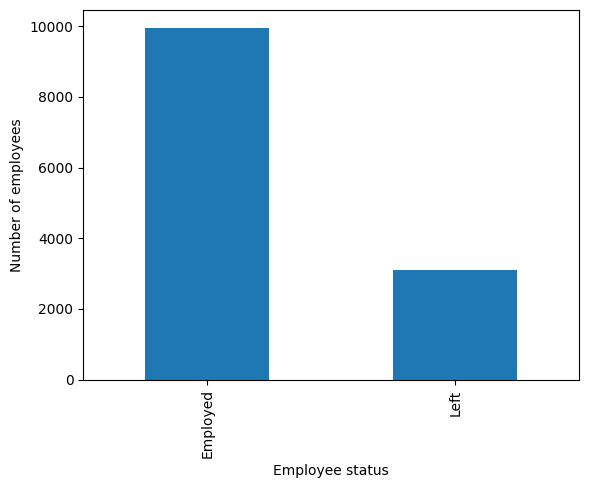

In [ ]:
data_final['status'].value_counts().plot(kind='bar')
plt.xlabel('Employee status')
plt.ylabel('Number of employees')

In [ ]:
data_final['status'].value_counts()

Employed    9961
Left        3092
Name: status, dtype: int64

# Observation #
Out of 13203 employees, 3112 left and 10091 stayed. The number of employees
left is approx 24% of total employment.

In [ ]:
data_final.columns

Index(['employee_id', 'age', 'gender', 'marital_status', 'avg_monthly_hrs',
       'filed_complaint', 'last_evaluation', 'n_projects', 'recently_promoted',
       'salary', 'satisfaction', 'status', 'tenure', 'dept_id', 'dept_name',
       'dept_head'],
      dtype='object')

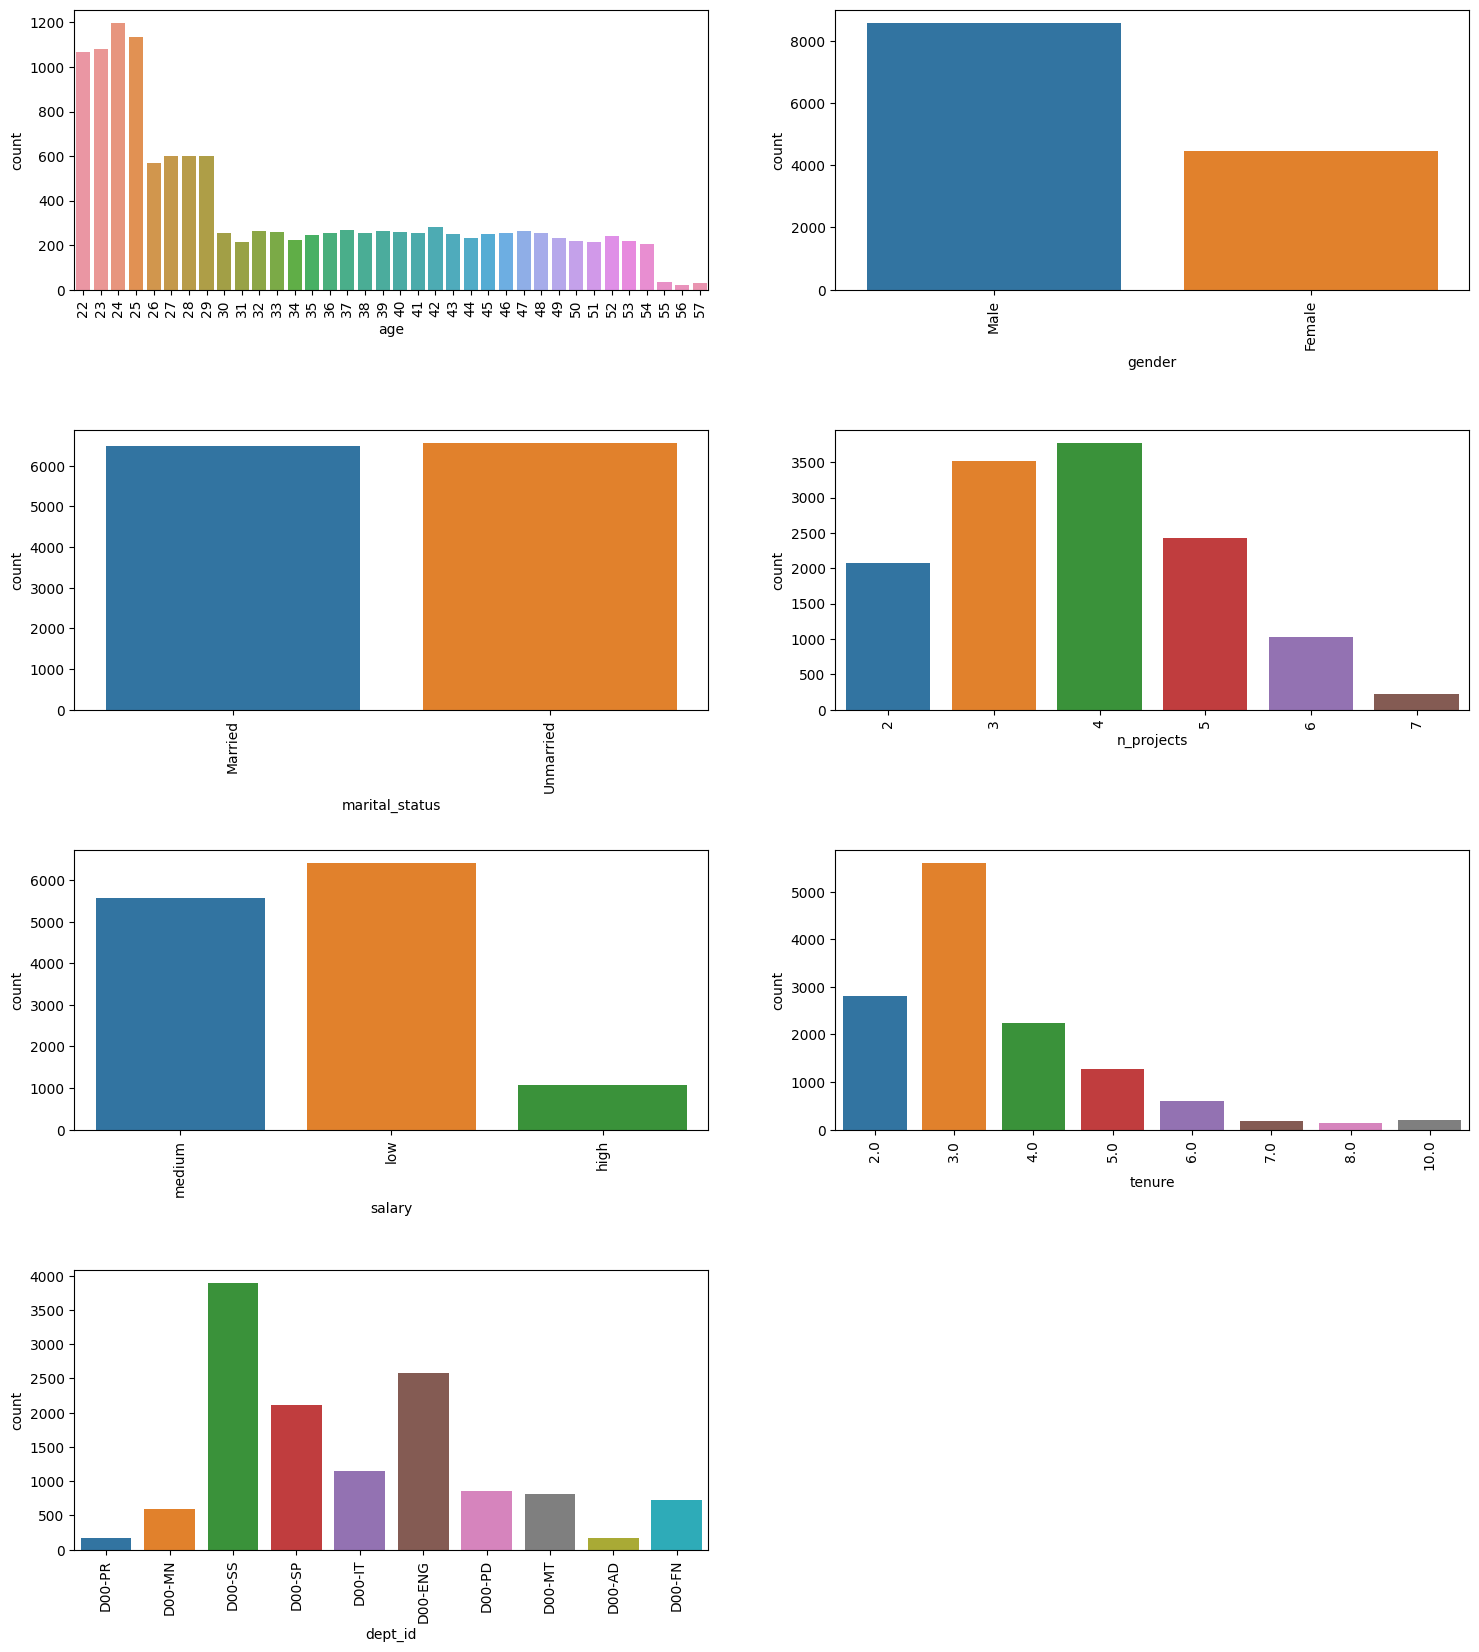

In [ ]:
features=['age', 'gender', 'marital_status','n_projects', 'salary','tenure','dept_id']
fig=plt.subplots(figsize=(18,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j, data=data_final)
    plt.xticks(rotation=90)


#### Observations:
**Age**:
•	24 and 25 yrs. age group employees are more in company.

•	Age can be grouped as 22-25, 26-29, 30-54 and 55-57.

•	22-25 yrs. age group has maximum number of employees.

•	From 25 yrs. Age band there is a drop in employee count which is constant till 29 yrs. Of age and same for age group 30-54.

•	Age group of 55-57 has less number of employees.

**Gender**:
Male employees are more than female employees.Male- 66%, female- 34%

**Marital status**:
There is not much difference in count of married and unmarried employees.

**Number of projects**:
Most of the employees are working on 3 to 4 projects.

**Salary**:
Most of the employees are getting salary either medium or low.

**Tenure**:
Most of the employees have worked for three years. there is huge gap in 3 years and 4 years experienced employees.

**Department**:
The sales department is having maximum number of employees followed by engineering and support.

<Axes: xlabel='last_evaluation', ylabel='Density'>

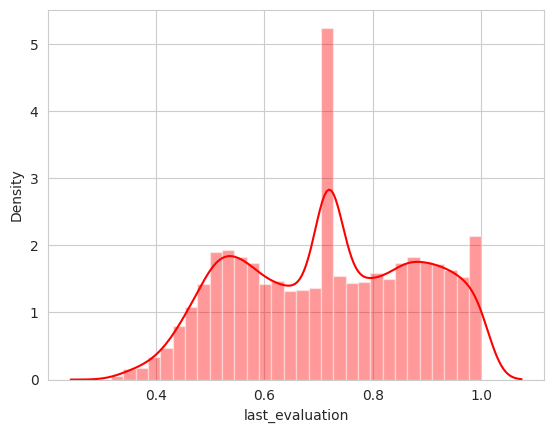

In [ ]:
sns.set_style('whitegrid')
sns.distplot(data_final['last_evaluation'],kde = True, color = 'red', bins=30)

<Axes: >

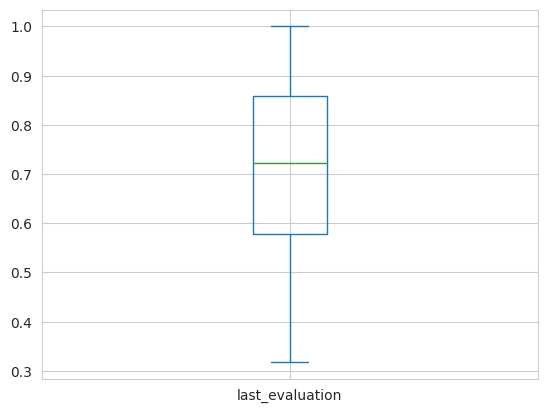

In [ ]:
data_final['last_evaluation'].plot.box()

#### Observation:
1. Data looks normally distributed.
2. No outliers seen in the data.

<Axes: xlabel='satisfaction', ylabel='Density'>

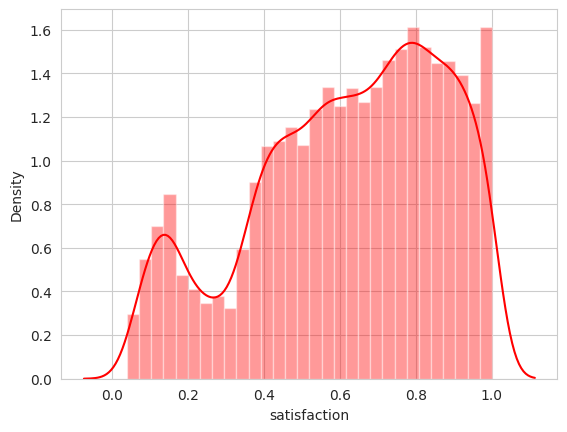

In [ ]:
sns.set_style('whitegrid')
sns.distplot(data_final['satisfaction'],kde = True, color = 'red', bins=30)

<Axes: >

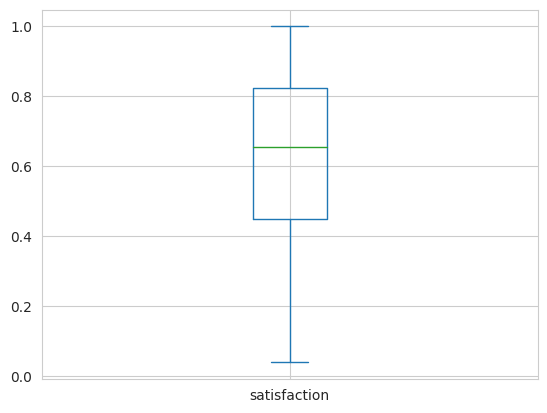

In [ ]:
data_final['satisfaction'].plot.box()

#### Observation:
1. Satisfation shows bimodal distribution.
2. Employees are either less satisfied or more satisfied.

<Axes: xlabel='avg_monthly_hrs', ylabel='Density'>

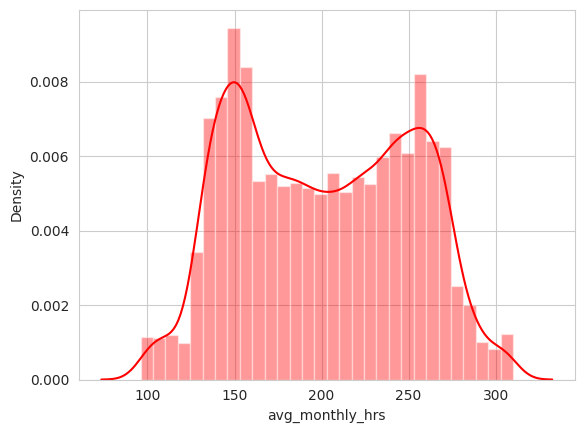

In [ ]:
sns.set_style('whitegrid')
sns.distplot(data_final['avg_monthly_hrs'],kde = True, color = 'red', bins=30)

<Axes: >

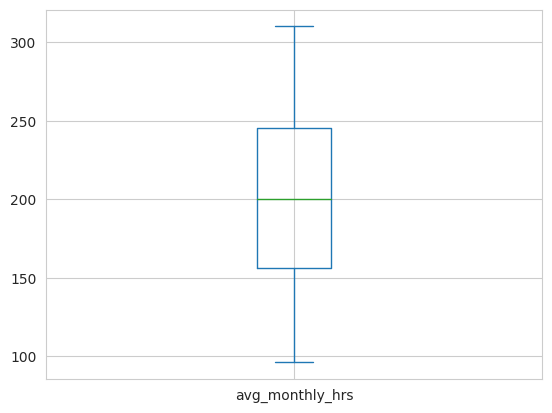

In [ ]:
data_final['avg_monthly_hrs'].plot.box()

#### Observations:
Avg_monthly hours shows bimodal distribution where maximum employees have worked either 150 or 260 hrs.

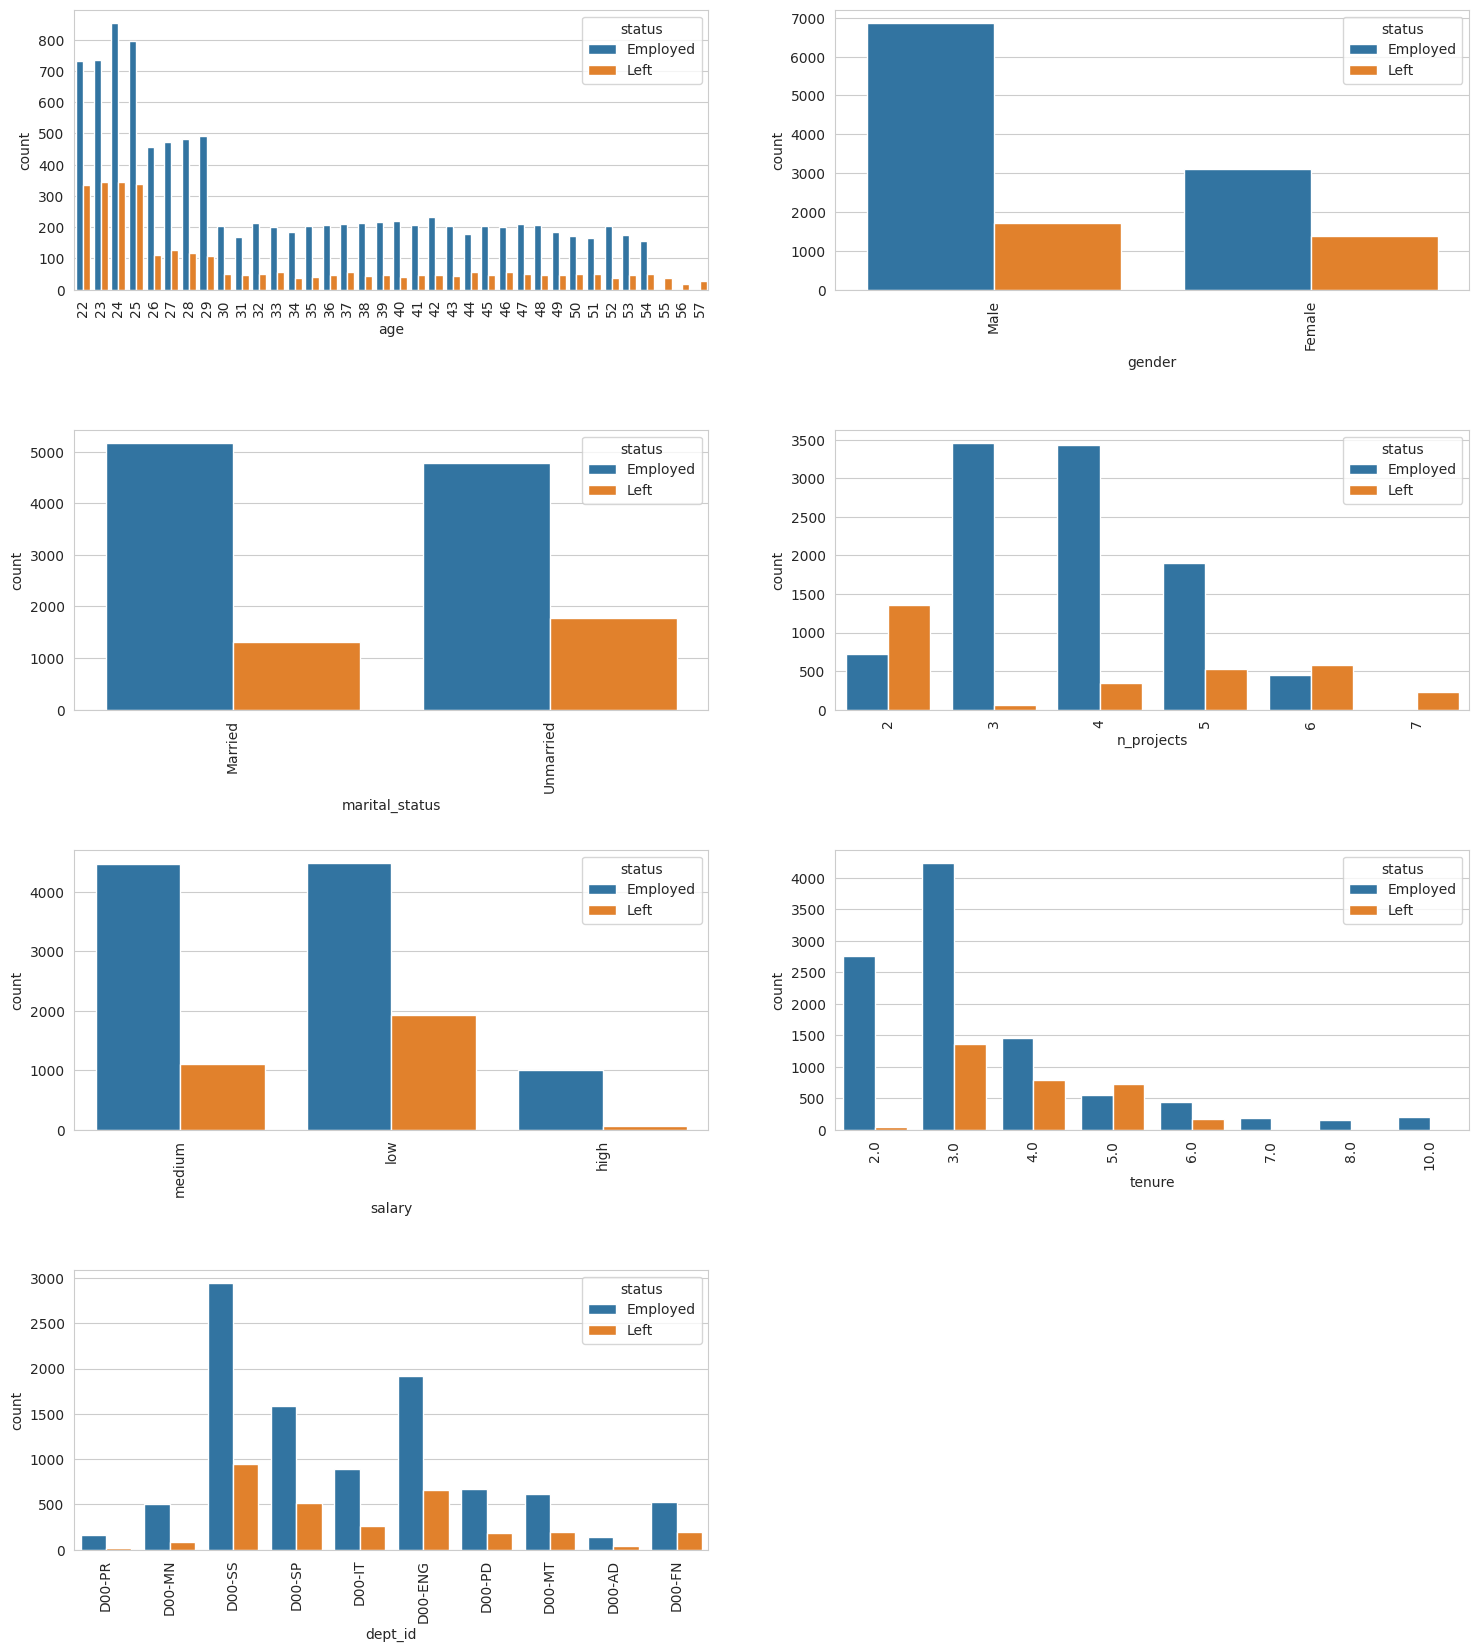

In [ ]:
features=['age', 'gender', 'marital_status','n_projects', 'salary','tenure','dept_id']
fig=plt.subplots(figsize=(18,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j, data=data_final, hue='status')
    plt.xticks(rotation=90)

#### Observations:
•	Those employees who have the number of projects more than 5 had left could be due to overload of work.

•	The employees with less and more number of projects are likely to leave.

•	Age 22-25 yrs. employees are leaving more than other age groups.

•	Employees who are getting medium or low salary have left the company.

•	Employees working for 3, 4 and 5 yrs. have left the organization. 3-year mark looks like a time to be crucial point in an employee's career. Most of them quit their job around three-year mark.

•	Another important point is 6-year point where employee is unlikely to leave.

•	Department wise from Sales, engineering and support department show trends of employees leaving.

Text(0, 0.5, 'Average monthly hours')

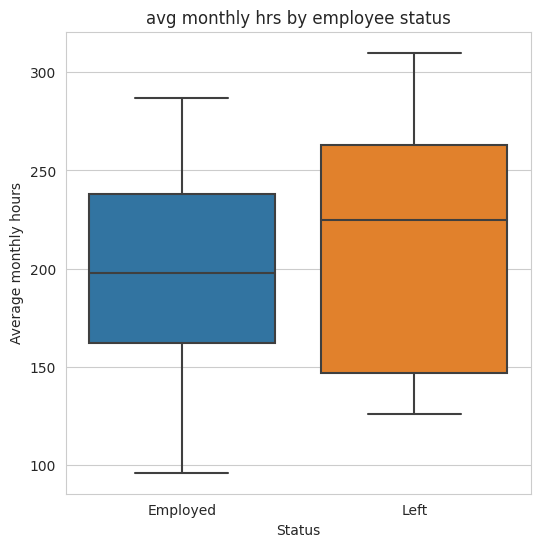

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='status',y='avg_monthly_hrs', data=data_final)
plt.title('avg monthly hrs by employee status')
plt.xlabel('Status')
plt.ylabel('Average monthly hours')

#### Observation:
Employees who have worked for more number of hours have left.

Text(0, 0.5, 'Last evaluation')

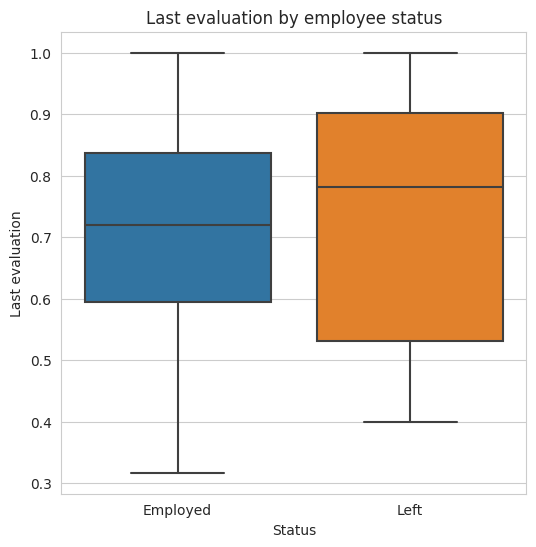

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='status',y='last_evaluation', data=data_final)
plt.title('Last evaluation by employee status')
plt.xlabel('Status')
plt.ylabel('Last evaluation')

#### Observation:
It is observed that those who got good score last year, looks like are leaving the company.

Text(0, 0.5, 'Satisfaction')

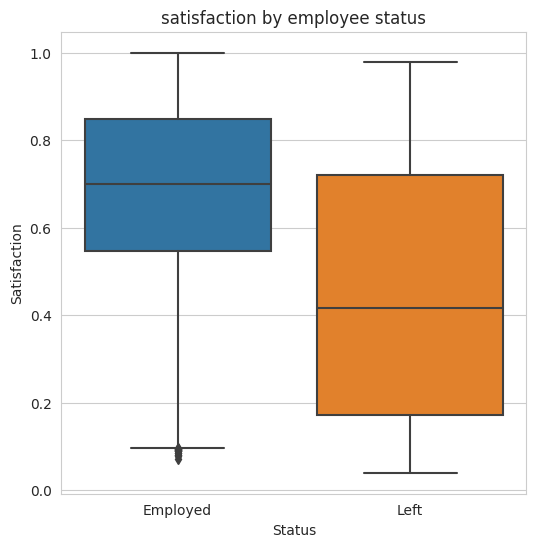

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='status',y='satisfaction', data=data_final)
plt.title('satisfaction by employee status')
plt.xlabel('Status')
plt.ylabel('Satisfaction')

Text(0, 0.5, 'recentlt promoted')

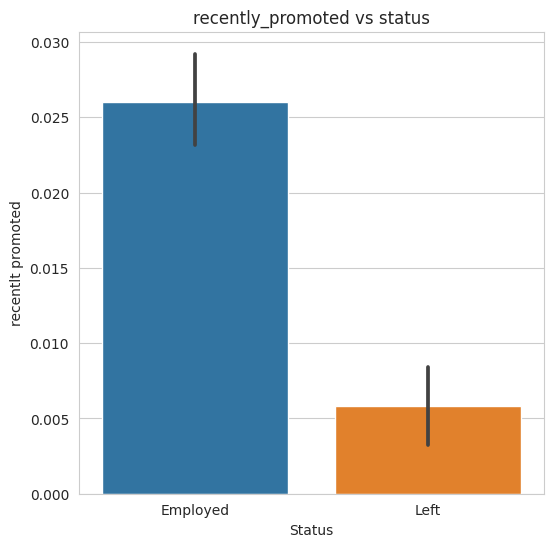

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x='status',y='recently_promoted', data=data_final)
plt.title('recently_promoted vs status')
plt.xlabel('Status')
plt.ylabel('recentlt promoted')

#### Observations:
The employees who got promoted tend to stay in the organisation.

<Axes: >

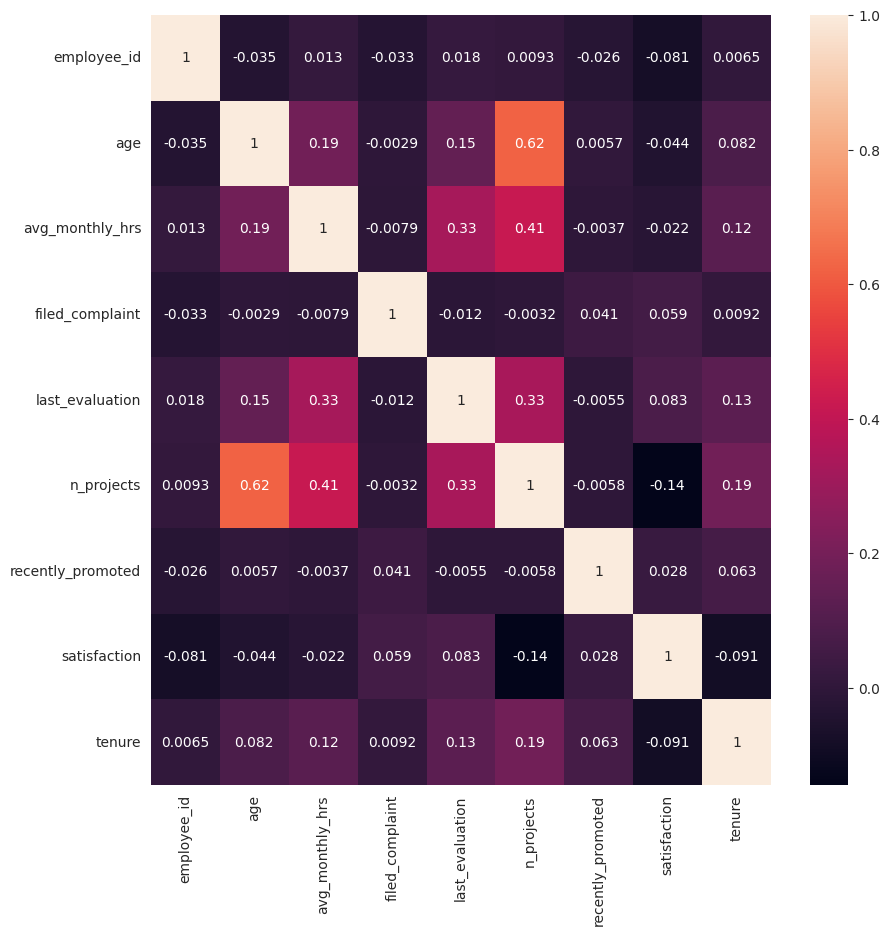

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data_final.corr(),annot=True)

#### Observations:
1. Age is highly correlated with number of projects.
2. Avg_monthly_hrs and last_evaluation are correlated with number of projects.

<a name = Section8></a>
## **8. Feature engineering**



*   The objective of feature engineering is to convert all columns into numerical values.
*   Status is updated with 'Employed' as 0 and 'Left' as 1



In [ ]:
data_final2=data_final.drop(['status'],axis=1)

In [ ]:
data_final2=pd.get_dummies(data_final2)

In [ ]:
pd.set_option('display.max_columns', None)
data_final2.head()

,employee_id,age,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,gender_Female,gender_Male,marital_status_Married,marital_status_Unmarried,salary_high,salary_low,salary_medium,dept_id_D00-AD,dept_id_D00-ENG,dept_id_D00-FN,dept_id_D00-IT,dept_id_D00-MN,dept_id_D00-MT,dept_id_D00-PD,dept_id_D00-PR,dept_id_D00-SP,dept_id_D00-SS,dept_name_Admin,dept_name_Engineering,dept_name_Finance,dept_name_IT,dept_name_Management,dept_name_Marketing,dept_name_Procurement,dept_name_Product,dept_name_Sales,dept_name_Support,dept_head_Aanchal J,dept_head_Amelia Westray,dept_head_Darcy Staines,dept_head_Edward J Bayley,dept_head_Ellie Trafton,dept_head_Evelyn Tolson,dept_head_Henry Adey,dept_head_Louie Viles,dept_head_Reuben Swann,dept_head_Sushant Raghunathan K
0,113558,43,111.0,0,0.753977,5,1,0.921208,4.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,108071,36,151.0,0,0.608282,5,0,0.210300,6.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,110888,42,152.0,0,0.673508,6,0,0.720369,3.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,115694,26,167.0,0,0.874656,3,0,0.575996,4.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,107767,43,174.0,1,0.634783,5,0,0.208138,5.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
data_final['status'].unique()

array(['Employed', 'Left'], dtype=object)

In [ ]:
encoding_map = {'Employed':0, 'Left':1}

In [ ]:
data_final['status']=data_final['status'].map(encoding_map)

In [ ]:
data_final.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,dept_id,dept_name,dept_head
0,113558,43,Male,Married,111.0,0,0.753977,5,1,medium,0.921208,0,4.0,D00-PR,Procurement,Louie Viles
1,108071,36,Male,Married,151.0,0,0.608282,5,0,medium,0.210300,0,6.0,D00-PR,Procurement,Louie Viles
2,110888,42,Male,Married,152.0,0,0.673508,6,0,medium,0.720369,0,3.0,D00-PR,Procurement,Louie Viles
3,115694,26,Male,Unmarried,167.0,0,0.874656,3,0,medium,0.575996,0,4.0,D00-PR,Procurement,Louie Viles
4,107767,43,Male,Married,174.0,1,0.634783,5,0,medium,0.208138,0,5.0,D00-PR,Procurement,Louie Viles


# Splitting the data

*   Split the train and test data with 80 and 20 proportion respectively.


In [ ]:
X = data_final2.drop(['employee_id'],axis=1)

In [ ]:
y = data_final['status']

In [ ]:
print(X.shape)
print(y.shape)

(13053, 45)
(13053,)


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10442, 45)
(2611, 45)
(10442,)
(2611,)


<a name = Section42></a>
## **9. Model evaluation**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
def model_eval(actual, predicted):
    acc_score= accuracy_score(actual, predicted)
    conf_matrix=confusion_matrix(actual, predicted)
    clas_rep=classification_report(actual,predicted)
    print('model accuracy is:', acc_score)
    print(conf_matrix)
    print(clas_rep)

In [ ]:
y_pred_train = logreg.predict(X_train)

y_pred_test = logreg.predict(X_test)

In [ ]:
model_eval(y_train, y_pred_train)

model accuracy is: 0.7983144991380962
[[7379  583]
 [1523  957]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7962
           1       0.62      0.39      0.48      2480

    accuracy                           0.80     10442
   macro avg       0.73      0.66      0.68     10442
weighted avg       0.78      0.80      0.78     10442



In [ ]:
model_eval(y_test, y_pred_test)

model accuracy is: 0.802757564151666
[[1876  123]
 [ 392  220]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1999
           1       0.64      0.36      0.46       612

    accuracy                           0.80      2611
   macro avg       0.73      0.65      0.67      2611
weighted avg       0.78      0.80      0.78      2611



Result: LogisticRegression

Has moderate Bias and Variance        
        

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
preds_rf_train = rf.predict(X_train)
preds_rf_test = rf.predict(X_test)

In [ ]:
model_eval(y_train, preds_rf_train)

model accuracy is: 1.0
[[7962    0]
 [   0 2480]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7962
           1       1.00      1.00      1.00      2480

    accuracy                           1.00     10442
   macro avg       1.00      1.00      1.00     10442
weighted avg       1.00      1.00      1.00     10442



In [ ]:
model_eval(y_test, preds_rf_test)

model accuracy is: 0.9701263883569513
[[1985   14]
 [  64  548]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1999
           1       0.98      0.90      0.93       612

    accuracy                           0.97      2611
   macro avg       0.97      0.94      0.96      2611
weighted avg       0.97      0.97      0.97      2611



#### Result: RandomForestClassifier

Has very low Bias 100%
Has low variance 97%

- Model is overfitting on train dataset.

# Feature Selection

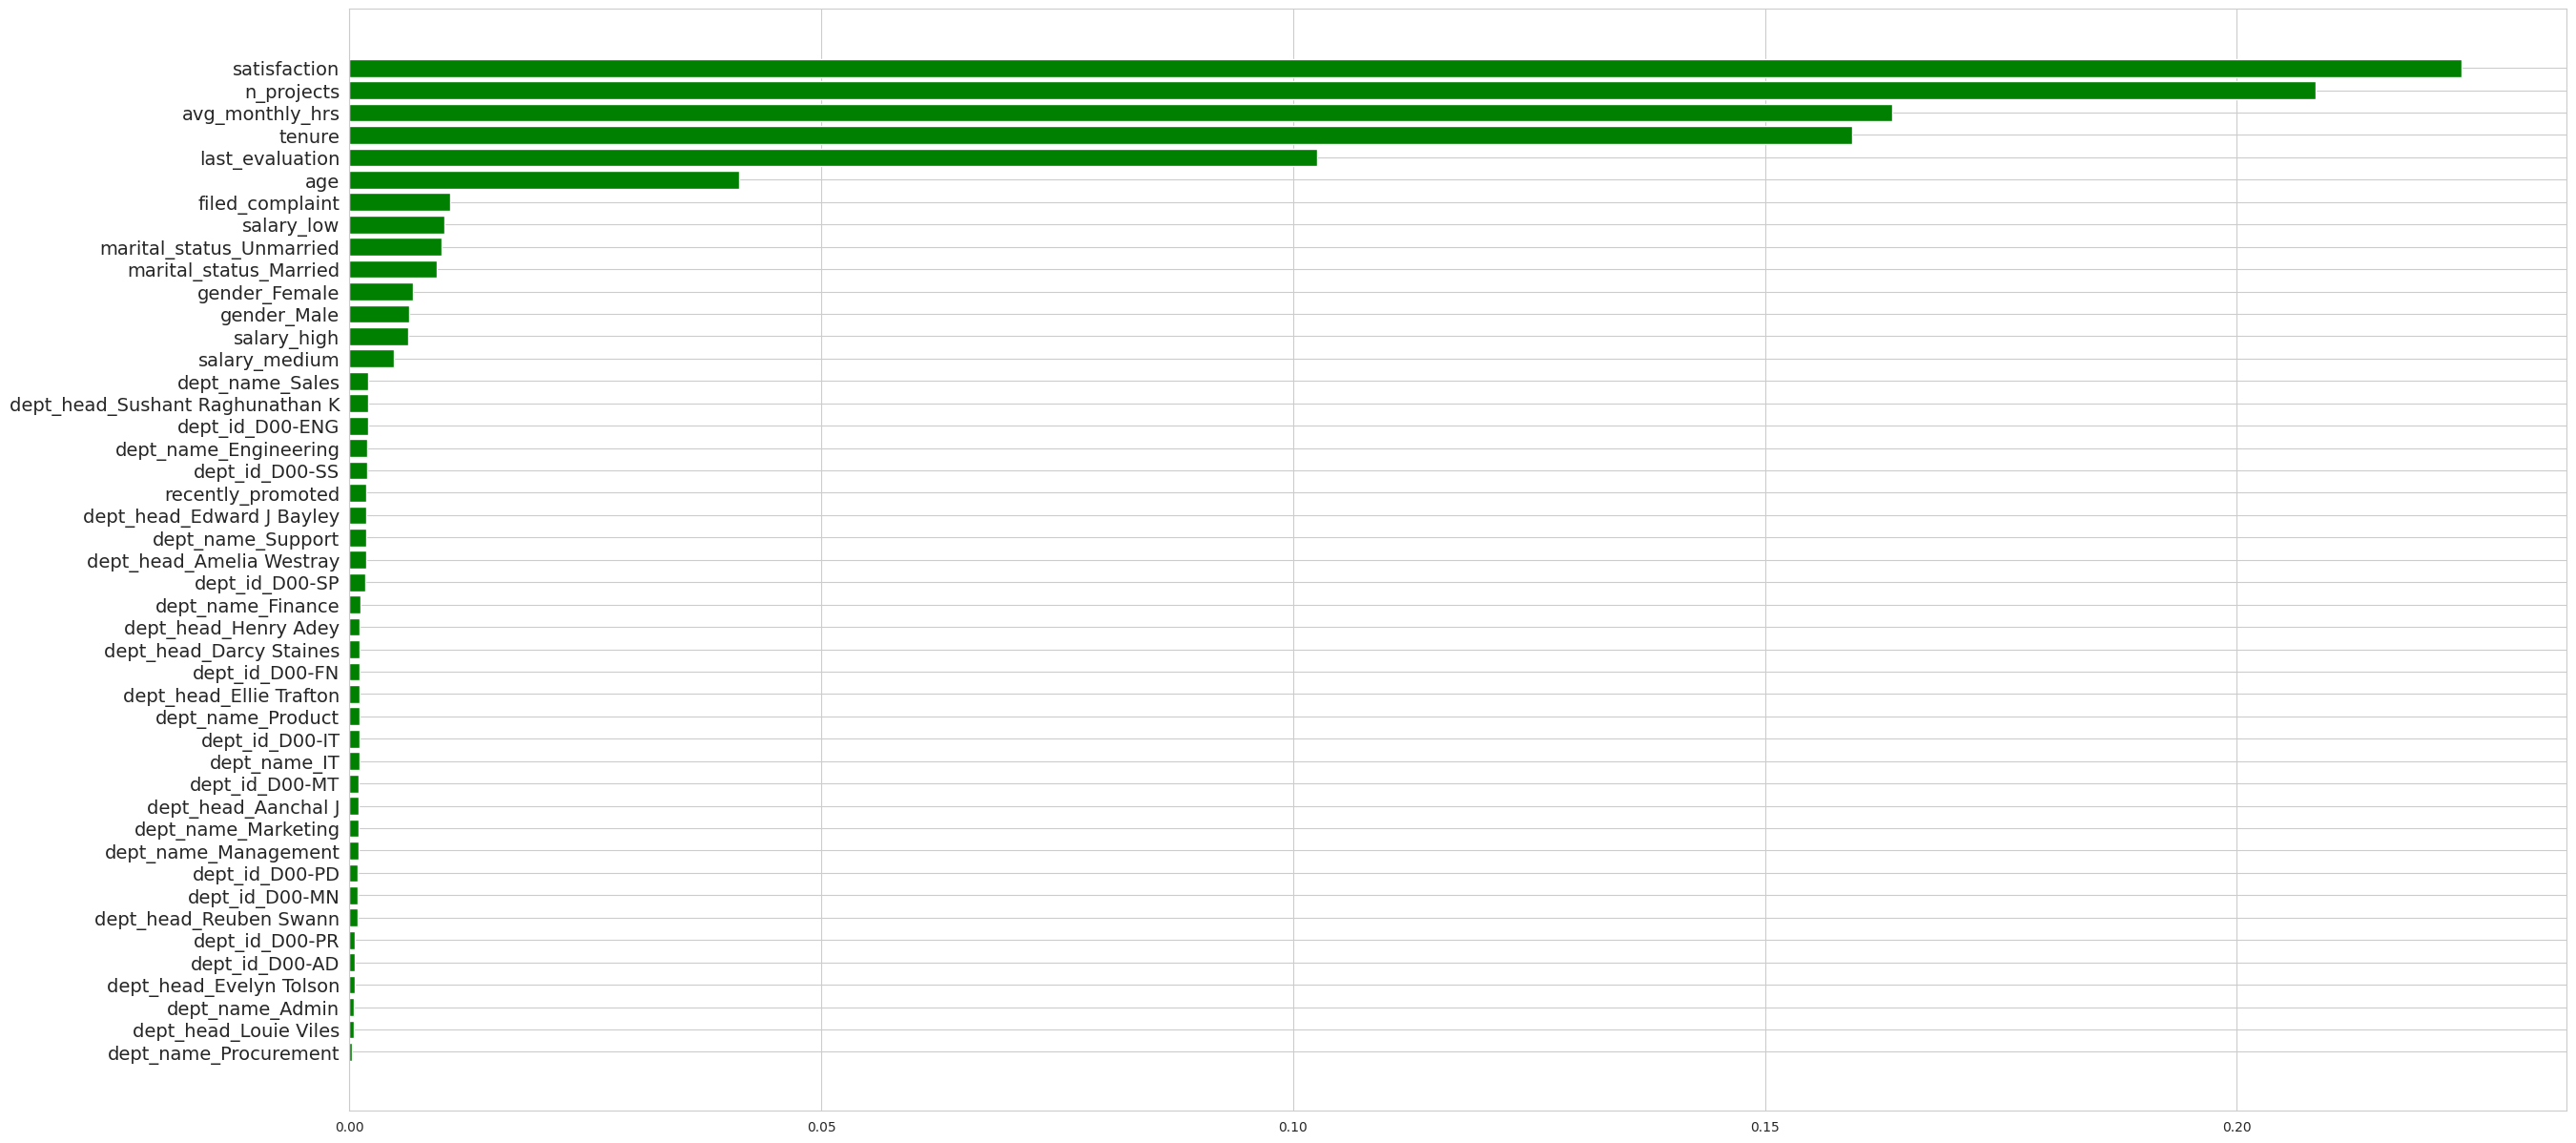

In [ ]:
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=[30, 15])
plt.barh(y=range(len(indices)), width=importances[indices], color='g', align='center')
plt.yticks(ticks=range(len(indices)), labels=[features[i] for i in indices], size=14)
plt.show()

In [ ]:
feature_scores=pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

satisfaction                       0.223760
n_projects                         0.208339
avg_monthly_hrs                    0.163495
tenure                             0.159280
last_evaluation                    0.102594
age                                0.041355
filed_complaint                    0.010668
salary_low                         0.010100
marital_status_Unmarried           0.009811
marital_status_Married             0.009285
gender_Female                      0.006722
gender_Male                        0.006345
salary_high                        0.006228
salary_medium                      0.004773
dept_name_Sales                    0.001997
dept_head_Sushant Raghunathan K    0.001989
dept_id_D00-ENG                    0.001985
dept_name_Engineering              0.001931
dept_id_D00-SS                     0.001870
recently_promoted                  0.001832
dept_head_Edward J Bayley          0.001805
dept_name_Support                  0.001795
dept_head_Amelia Westray        

In [ ]:
X_train.columns

Index(['age', 'avg_monthly_hrs', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'satisfaction', 'tenure',
       'gender_Female', 'gender_Male', 'marital_status_Married',
       'marital_status_Unmarried', 'salary_high', 'salary_low',
       'salary_medium', 'dept_id_D00-AD', 'dept_id_D00-ENG', 'dept_id_D00-FN',
       'dept_id_D00-IT', 'dept_id_D00-MN', 'dept_id_D00-MT', 'dept_id_D00-PD',
       'dept_id_D00-PR', 'dept_id_D00-SP', 'dept_id_D00-SS', 'dept_name_Admin',
       'dept_name_Engineering', 'dept_name_Finance', 'dept_name_IT',
       'dept_name_Management', 'dept_name_Marketing', 'dept_name_Procurement',
       'dept_name_Product', 'dept_name_Sales', 'dept_name_Support',
       'dept_head_Aanchal J', 'dept_head_Amelia Westray',
       'dept_head_Darcy Staines', 'dept_head_Edward J Bayley',
       'dept_head_Ellie Trafton', 'dept_head_Evelyn Tolson',
       'dept_head_Henry Adey', 'dept_head_Louie Viles',
       'dept_head_Reuben Swann', 'dept_h

In [ ]:
X1 = data_final2.drop(['employee_id','age', 'filed_complaint', 'recently_promoted','gender_Female', 'gender_Male', 'marital_status_Married','marital_status_Unmarried', 'salary_high', 'salary_low','salary_medium', 'dept_id_D00-AD', 'dept_id_D00-ENG', 'dept_id_D00-FN','dept_id_D00-IT', 'dept_id_D00-MN', 'dept_id_D00-MT', 'dept_id_D00-PD', 'dept_id_D00-PR', 'dept_id_D00-SP', 'dept_id_D00-SS', 'dept_name_Admin',
       'dept_name_Engineering', 'dept_name_Finance', 'dept_name_IT',
       'dept_name_Management', 'dept_name_Marketing', 'dept_name_Procurement',
       'dept_name_Product', 'dept_name_Sales', 'dept_name_Support',
       'dept_head_Aanchal J', 'dept_head_Amelia Westray',
       'dept_head_Darcy Staines', 'dept_head_Edward J Bayley',
       'dept_head_Ellie Trafton', 'dept_head_Evelyn Tolson',
       'dept_head_Henry Adey', 'dept_head_Louie Viles',
       'dept_head_Reuben Swann', 'dept_head_Sushant Raghunathan K'],axis=1)

In [ ]:
X1.columns

Index(['avg_monthly_hrs', 'last_evaluation', 'n_projects', 'satisfaction',
       'tenure'],
      dtype='object')

In [ ]:
X1_train, X1_test, y_train, y_test=train_test_split(X1, y, test_size=0.2, random_state=123)

In [ ]:
print(X1_train.shape)
print(X1_test.shape)
print(y_train.shape)
print(y_test.shape)

(10442, 5)
(2611, 5)
(10442,)
(2611,)


In [ ]:
import xgboost as xgb

In [ ]:
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [ ]:
#making model libraries to test
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Adaboost':AdaBoostClassifier(),
    'Gradient Boost':GradientBoostingClassifier(),
    'XGBoost':xgb.XGBClassifier()
}
results = {}
for model_name, model in models.items():
    model.fit(X1_train, y_train)
    y_pred_train = model.predict(X1_train)  # Predictions on training data
    y_pred_test = model.predict(X1_test)    # Predictions on testing data

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    classification_rep_train = classification_report(y_train, y_pred_train)
    classification_rep_test = classification_report(y_test, y_pred_test)

    results[model_name] = {
        'train_accuracy': accuracy_train,
        'test_accuracy': accuracy_test,
        'train_classification_report': classification_rep_train,
        'test_classification_report': classification_rep_test
    }

# Display results for datasets
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print("Training Results:")
    print(f"  Accuracy: {result['train_accuracy']:.2f}")
    print(f"  Classification Report:\n{result['train_classification_report']}\n")
    print("Testing Results:")
    print(f"  Accuracy: {result['test_accuracy']:.2f}")
    print(f"  Classification Report:\n{result['test_classification_report']}\n")

Model: Logistic Regression
Training Results:
  Accuracy: 0.77
  Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      7962
           1       0.54      0.27      0.36      2480

    accuracy                           0.77     10442
   macro avg       0.67      0.60      0.61     10442
weighted avg       0.74      0.77      0.74     10442


Testing Results:
  Accuracy: 0.76
  Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1999
           1       0.49      0.24      0.32       612

    accuracy                           0.76      2611
   macro avg       0.65      0.58      0.59      2611
weighted avg       0.73      0.76      0.73      2611


Model: Decision Tree
Training Results:
  Accuracy: 1.00
  Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7962
        

### Observations for model selection:

- Out of all models, Adaboost and Gradient boost shows better results. Out of these two models, based on following points we will choose one best model:

1. **Leaving Employees**:
   - AdaBoost has an F1 score of 0.83 on the test set.
   - Gradient Boost has an F1 score of 0.92 on the test set.

   If correctly identifying and predicting employees who are likely to leave is a top priority, then Gradient Boost, with its higher F1 score for class 1 on the test set, might be the better choice.
   

2. **Overall Balance**:
   - AdaBoost has relatively balanced F1 scores for both 0 (employees staying employed) and 1 (employees leaving), indicating a trade-off between precision and recall for both classes.
   - Gradient Boost excels in predicting for 0 (employees staying employed) with high precision and recall, but the F1 score for class 1 is slightly lower.


3. **Model Complexity and Interpretability**:
   - AdaBoost is generally simpler and more interpretable compared to Gradient Boost. If model interpretability is a priority, this may favor AdaBoost.
   

4. **Overfitting**:
   - Both models have a small drop in F1 scores from the training set to the test set, indicating some degree of overfitting. However, the overfitting in both cases is not extreme.

- In summary, to predict employee retention accurately and you can use slightly higher model complexity of Gradient Boost, it appears to offer a better F1 score for that class and also it has high accuracy.



<a name = Section10></a>
## **10. Model Threshold Analysis**

In [ ]:
gb = GradientBoostingClassifier()

gb.fit(X1_train, y_train)
y_pred_prob = gb.predict_proba(X1_test)[:, 1]                       # gives probability of class 1 (left)
threshold = 0.7
y_pred = (y_pred_prob > threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Accuracy: 0.9643814630409805
F1 Score: 0.9207161125319694


In [ ]:
ada = AdaBoostClassifier()

ada.fit(X1_train, y_train)
y_pred_prob = ada.predict_proba(X1_test)[:, 1]                       # gives probability of class 1 (left)
threshold = 0.7
y_pred = (y_pred_prob > threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.7709689774032937
F1 Score: 0.04472843450479233


Even with threshold of 0.7 we found Gradient Boost performs well with both train and test dataset.


<a name = Section11></a>
## **11. Hyper parameter tuning**

In [ ]:
distributions = dict(n_estimators=[50,100,150,200,250], learning_rate=[0.01,0.05,0.1,0.25,0.5,1], max_depth=[1,2,3,4,5])

In [ ]:
clf=RandomizedSearchCV(gb, distributions, random_state=123, verbose=2)

In [ ]:
clf.fit(X1_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   2.5s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   2.5s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   3.4s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   3.5s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   2.5s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=150; total time=   1.6s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=150; total time=   1.6s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=150; total time=   1.6s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=150; total time=   1.6s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=150; total time=   1.7s
[CV] END .....learning_rate=1, max_depth=2, n_estimators=150; total time=   1.6s
[CV] END .....learning_rate=1, max_depth=2, n_es

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.25,
                                                          0.5, 1],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250]},
                   random_state=123, verbose=2)

In [ ]:
print(clf.best_params_)

{'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1}


In [ ]:
gb = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=5)
gb.fit(X1_train, y_train)
preds_gb_train = gb.predict(X1_train)
preds_gb_test = gb.predict(X1_test)

In [ ]:
model_eval(y_train, preds_gb_train)

model accuracy is: 0.9907105918406436
[[7936   26]
 [  71 2409]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7962
           1       0.99      0.97      0.98      2480

    accuracy                           0.99     10442
   macro avg       0.99      0.98      0.99     10442
weighted avg       0.99      0.99      0.99     10442



In [ ]:
model_eval(y_test, preds_gb_test)

model accuracy is: 0.9701263883569513
[[1973   26]
 [  52  560]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1999
           1       0.96      0.92      0.93       612

    accuracy                           0.97      2611
   macro avg       0.96      0.95      0.96      2611
weighted avg       0.97      0.97      0.97      2611



- After hyper parameter tuning, for training set, accuracy increased to 99% from 97%. And F1- score for 1 increased to 0.95.
- For test dataset, accuracy increased to 97% from 96%. And F1- score for 1 increased to 0.93

<a name = Section12></a>
## **12. Model cross validation**

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Using optimized parameters
model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=5)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

num_folds = 5
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform cross-validation and store the results in a dictionary
results = cross_validate(model, X1, y, cv=cv, scoring=scoring)

# Extract and calculate the mean and standard deviation for each metric
mean_accuracy = results['test_accuracy'].mean()
mean_precision = results['test_precision'].mean()
mean_recall = results['test_recall'].mean()
mean_f1_score = results['test_f1_score'].mean()
std_f1_score = results['test_f1_score'].std()

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1 Score: {mean_f1_score}")
print(f"Standard Deviation of F1 Scores: {std_f1_score}")

Mean Accuracy: 0.9731862397666224
Mean Precision: 0.959482563575215
Mean Recall: 0.9259391125680319
Mean F1 Score: 0.9424013420027768
Standard Deviation of F1 Scores: 0.006533277116498048


- To check whether our model is overpredicting or not, we performed cross validation. And after cross validation there is no much variation in accuracy and F1 score of test dataset. So we can conclude that model is not over predicting.

In [ ]:
optimized_gbc = GradientBoostingClassifier(n_estimators=150, max_depth=5, learning_rate=0.1)

# Train the model on your entire training dataset.
optimized_gbc.fit(X1_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=150)

<a name = Section13></a>
## **13. Unseen Data Analysis**

In [ ]:
Unseen_data=pd.read_excel(r"/content/unseen_data.xlsx")

In [ ]:
Unseen_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,134,D00-IT,NaN,0.528841,2,NaN,low,0.400464,3.0,119045
1,221,D00-PD,NaN,0.784561,2,NaN,low,0.759513,3.0,112223
2,156,D00-SS,NaN,0.545183,2,NaN,medium,0.336457,3.0,103924
3,133,D00-PR,NaN,NaN,4,NaN,medium,0.832039,2.0,105922
4,135,D00-SS,NaN,0.454637,2,NaN,low,0.320723,5.0,103297


In [ ]:
Unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         98 non-null     object 
 2   filed_complaint    15 non-null     float64
 3   last_evaluation    83 non-null     float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  3 non-null      float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


In [ ]:
Unseen_data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
count,100.000000,15.0,83.000000,100.000000,3.0,97.000000,97.000000,100.000000
mean,198.810000,1.0,0.744114,3.760000,1.0,0.629632,3.422680,112515.750000
std,53.185723,0.0,0.169536,1.349298,0.0,0.246901,1.566811,9466.676715
min,68.000000,1.0,0.396801,1.000000,1.0,0.051515,2.000000,100230.000000
25%,154.500000,1.0,0.576181,3.000000,1.0,0.477002,2.000000,105855.000000
50%,206.000000,1.0,0.748131,4.000000,1.0,0.660827,3.000000,110557.000000
75%,247.500000,1.0,0.901458,5.000000,1.0,0.832039,4.000000,117130.250000
max,289.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000,145105.000000


In [ ]:
Unseen_data['filed_complaint']=Unseen_data['filed_complaint'].fillna(0)    # Since 1 means those who have filed complaint, for others it is given as NaN which can be replaced with zero.

In [ ]:
Unseen_data['recently_promoted']=Unseen_data['recently_promoted'].fillna(0)        # Those who got promoted are given value 1, so NaN means they dont get promoted and can be represented by zero.

In [ ]:
Unseen_data['last_evaluation'].fillna(Unseen_data['last_evaluation'].mean(),inplace=True)

In [ ]:
Unseen_data['satisfaction'].fillna(Unseen_data['satisfaction'].mean(),inplace=True)

In [ ]:
Unseen_data['tenure'].fillna(Unseen_data['tenure'].mean(),inplace=True)

In [ ]:
Unseen_data['department']=Unseen_data['department'].fillna('D00-SS')

In [ ]:
Unseen_data['filed_complaint']=Unseen_data['filed_complaint'].astype('int')

In [ ]:
Unseen_data['recently_promoted']=Unseen_data['recently_promoted'].astype('int')

In [ ]:
Unseen_data.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
tenure               0
employee_id          0
dtype: int64

In [ ]:
Unseen_data_f=pd.get_dummies(Unseen_data)

In [ ]:
pd.set_option('display.max_columns', None)
Unseen_data_f.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,department_-IT,department_D00-AD,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP,salary_high,salary_low,salary_medium
0,134,0,0.528841,2,0,0.400464,3.0,119045,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,221,0,0.784561,2,0,0.759513,3.0,112223,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,156,0,0.545183,2,0,0.336457,3.0,103924,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,133,0,0.744114,4,0,0.832039,2.0,105922,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,135,0,0.454637,2,0,0.320723,5.0,103297,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5,157,0,0.570767,4,0,0.810483,3.0,115525,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
6,153,0,0.675263,2,0,0.611412,3.0,116409,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7,264,1,0.744114,4,0,0.445556,2.0,109427,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
8,179,0,0.744114,5,0,0.534336,3.0,118590,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
9,169,0,0.782310,3,0,0.949086,3.0,107075,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
Unseen_data_f.columns

Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'satisfaction', 'tenure', 'employee_id',
       'department_-IT', 'department_D00-AD', 'department_D00-ENG',
       'department_D00-FN', 'department_D00-IT', 'department_D00-MN',
       'department_D00-MT', 'department_D00-PD', 'department_D00-PR',
       'department_D00-SP', 'department_D00-SS', 'department_D00-TP',
       'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [ ]:
# dropping unnecessary columns from unseen data
X_new=Unseen_data_f.drop(['employee_id','filed_complaint',
       'recently_promoted',
       'department_-IT', 'department_D00-AD', 'department_D00-ENG',
       'department_D00-FN', 'department_D00-IT', 'department_D00-MN',
       'department_D00-MT', 'department_D00-PD', 'department_D00-PR',
       'department_D00-SP', 'department_D00-SS', 'department_D00-TP',
       'salary_high', 'salary_low', 'salary_medium'],axis=1)

In [ ]:
print("X_new shape:", X_new.shape)


X_new shape: (100, 5)


In [ ]:
import joblib

# Save the trained model to a file.
joblib.dump(optimized_gbc, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

In [ ]:
predictions = optimized_gbc.predict_proba(X_new)

In [ ]:
probability_of_leaving = predictions[:, 1]

In [ ]:
probability_of_leaving= pd.DataFrame(probability_of_leaving)

In [ ]:
# Extract the "Employee ID" column from your unseen data
employee_ids = Unseen_data["employee_id"]

# Merge the "Employee ID" column with the probability predictions
result = pd.concat([employee_ids, probability_of_leaving], axis=1)

# Save the result without headers to a CSV file
result.to_csv('final_result.csv', index=False, header=False)

<a name = Section14></a>

---
# **14. Conclusion**
---

- We have built a Gradient Boost model giving accuracy of 97%, which is considered a good accuracy.
- Our model is good at predicting on unseen dataset.
- **Precision**: Precision is about being precise. When a model makes a prediction. how often it is correct. In our case, Gradient boost model predicted an employee is going to leave, that employee actually left 97% of the time.
- **Recall**: If there is an employee who left present in the test set and Gradient boosting model can identify it 93% of the time.
        